# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualisation skills, including aggregation, interactive visualisations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

### Instructions

Use the `san_francisco_housing.ipynb` notebook to visualise and analyse the real-estate data.

Note that this assignment requires you to create a visualisation by using hvPlot and GeoViews. Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualise and analyse the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighbourhood.

* Build an interactive neighbourhood map.

* Compose your data story.

#### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualise the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualisation.

4. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting bar chart.](Images/6-4-zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analysing?

#### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualise the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualisation.

5. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting plot.](Images/6-4-avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

#### Compare the Average Sale Prices by Neighbourhood

For this part of the assignment, use interactive visualisations and widgets to explore the average sale price per square foot by neighbourhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighbourhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualises both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighbourhood`.

4. Style and format the line plot to ensure a professionally styled visualisation.

5. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting plot.](Images/6-4-pricing-info-by-neighborhood.png)

6. Use the interactive visualisation to answer the following question:

    * For the Anza Vista neighbourhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012?

#### Build an Interactive Neighbourhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualisations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighbourhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighbourhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighbourhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighbourhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighbourhood_info_df` that groups the data by neighbourhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighbourhood_locations_df` DataFrame with the `all_neighbourhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighbourhoods_df`. The second cell cleans the data and sets the “Neighbourhood” column. Be sure to run these cells to create the `all_neighbourhoods_df` DataFrame, which you’ll need to create the geospatial visualisation.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighbourhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `frame_width` parameter to 700.

    * Set the `frame_height` parameter to 500.

    * Include a descriptive title.

    Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighbourhood has the highest gross rent, and which has the highest sale price per square foot?

#### Compose Your Data Story

Based on the visualisations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighbourhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighbourhoods exist that you would suggest for investment, and why?

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

# Set File Paths
neighbourhood_locations_data = Path('Resources/neighbourhoods_coordinates.csv')
sfo_data_data = Path('Resources/sfo_neighbourhoods_census_data.csv')

## Import the data 

In [2]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighbourhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(sfo_data_data)

# Clean Data and Prepare 
sfo_data_df.isnull().count()
sfo_data_df.dropna()
sfo_data_df['neighbourhood']=sfo_data_df['neighbourhood'].str.replace('/','',regex=False)
sfo_data_df= sfo_data_df.set_index('neighbourhood')

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head(n=5))
display(sfo_data_df.tail(n=5))



,year,sale_price_sqr_foot,housing_units,gross_rent
neighbourhood,,,,
Alamo Square,2010,291.182945,372560,1239
Anza Vista,2010,267.932583,372560,1239
Bayview,2010,170.098665,372560,1239
Buena Vista Park,2010,347.394919,372560,1239
Central Richmond,2010,319.027623,372560,1239


,year,sale_price_sqr_foot,housing_units,gross_rent
neighbourhood,,,,
Telegraph Hill,2016,903.049771,384242,4390
Twin Peaks,2016,970.085470,384242,4390
Van Ness Civic Center,2016,552.602567,384242,4390
Visitacion Valley,2016,328.319007,384242,4390
Westwood Park,2016,631.195426,384242,4390


---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualise the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualisation.

4. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting bar chart.](Images/6-4-zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analysing?

### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [3]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby('year').mean()

# Review the DataFrame
display(housing_units_by_year)

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualisation.

In [5]:
# Create a visual aggregation explore the housing units by year
housing_units_df = housing_units_by_year['housing_units']
hv_bar_plot = housing_units_df.hvplot.bar(xlabel='Year' ,ylabel='Housing units', title='Housing Units In Sanfransisco from 2010 to 2016',rot=30, yformatter= '%.0f',hover_color = 'green')
hv_bar_plot

:Bars   [year]   (housing_units)

In [6]:
hv_line_plot = housing_units_df.hvplot.line(xlabel='Year', ylabel='Housing units', title='Housing Units In Sanfransisco from 2010 to 2016', rot=30, yformatter= '%.0f',hover_color = 'green')
hv_line_plot


:Curve   [year]   (housing_units)

### Step 5: Answer the following question:

**Question:** What is the overall trend in housing_units over the period being analysed?

**Answer:** The overal trend indicates a positive slope and shows an increase in housing units from 372560 to 384242 in the period observed between 2010-2016. 

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualise the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualisation.

5. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting plot.](Images/6-4-avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

### Step 1: Group the data by year, and then average the results.

In [7]:
# Create a numerical aggregation by grouping the data by year and averaging the results
average_sales_price_year = sfo_data_df.groupby('year').mean()


# Review the resulting DataFrame
display(average_sales_price_year)

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


**Question:** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer:** The Lowest gross rent reported was 1239 in the year 2010

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [8]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = average_sales_price_year[['sale_price_sqr_foot','gross_rent']]

# Review the DataFrame
display(prices_square_foot_by_year)

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualisation.


In [9]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
hv_plot_prices = prices_square_foot_by_year.hvplot.line(xlabel='Year', ylabel='Sale price per sqr foot/Gross rent', title='Sale Price Per Square Foot and Average Gross Rent - 2010-2016 By Neighbourhood', rot=30, yformatter= '%.0f',hover_color = 'green')
hv_plot_prices

:NdOverlay   [Variable]
   :Curve   [year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question:** Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer:** Yes in the year 2011 there was a drop in the average sale price per square foot! 

**Question:** If so, did the gross rent increase or decrease during that year?

**Answer:** The gross rent increased during that year to 1530!

---

## Compare the Average Sale Prices by Neighbourhood

For this part of the assignment, use interactive visualisations and widgets to explore the average sale price per square foot by neighbourhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighbourhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualises both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighbourhood`.

4. Style and format the line plot to ensure a professionally styled visualisation.

5. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting plot.](Images/6-4-pricing-info-by-neighborhood.png)

6. Use the interactive visualisation to answer the following question:

    * For the Anza Vista neighbourhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012?


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighbourhood. Aggregate the results by the `mean` of the groups.

In [10]:
# Group by year and neighbourhood and then create a new dataframe of the mean values
prices_by_year_by_neighbourhood = sfo_data_df.groupby(['year','neighbourhood']).mean()


# Review the DataFrame
display(prices_by_year_by_neighbourhood)

sale_price_sqr_foot  housing_units  gross_rent
year neighbourhood                                                        
2010 Alamo Square                    291.182945       372560.0      1239.0
     Anza Vista                      267.932583       372560.0      1239.0
     Bayview                         170.098665       372560.0      1239.0
     Buena Vista Park                347.394919       372560.0      1239.0
     Central Richmond                319.027623       372560.0      1239.0
...                                         ...            ...         ...
2016 Telegraph Hill                  903.049771       384242.0      4390.0
     Twin Peaks                      970.085470       384242.0      4390.0
     Van Ness Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley               328.319007       384242.0      4390.0
     Westwood Park                   631.195426       384242.0      4390.0

[397 rows x 3 columns]

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [11]:
# Filter out the housing_units
prices_by_year_by_neighbourhood = prices_by_year_by_neighbourhood[['sale_price_sqr_foot','gross_rent']]

# Review the first and last five rows of the DataFrame
display(prices_by_year_by_neighbourhood.head(n=5))
display(prices_by_year_by_neighbourhood.tail(n=5))

sale_price_sqr_foot  gross_rent
year neighbourhood                                    
2010 Alamo Square               291.182945      1239.0
     Anza Vista                 267.932583      1239.0
     Bayview                    170.098665      1239.0
     Buena Vista Park           347.394919      1239.0
     Central Richmond           319.027623      1239.0

sale_price_sqr_foot  gross_rent
year neighbourhood                                         
2016 Telegraph Hill                  903.049771      4390.0
     Twin Peaks                      970.085470      4390.0
     Van Ness Civic Center           552.602567      4390.0
     Visitacion Valley               328.319007      4390.0
     Westwood Park                   631.195426      4390.0

### Step 3: Create an interactive line plot with hvPlot that visualises both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighbourhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualisation.

In [12]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighbourhood
hv_plot_neighbourhood = prices_by_year_by_neighbourhood.hvplot.line(x='year', 
                                                                    ylabel='Sale Price Per Sqr Foot/Gross Rent',
                                                                    title='Sale Price Per Square Foot and Average Gross Rent - 2010-2016 By Neighbourhood',
                                                                    rot=30,
                                                                    widget_type='individual',
                                                                    groupby='neighbourhood',
                                                                    hover_color = 'green',)
                                                        
hv_plot_neighbourhood

Row
    [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)
    [1] WidgetBox(align=('end', 'start'))
        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Alamo Square', ...], value='Alamo Square', width=250)

### Step 6: Use the interactive visualisation to answer the following question:

**Question:** For the Anza Vista neighbourhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer:** For the Anza Vista neighbourhood the average sale price per square foot was less for 2016 than 2012!

---

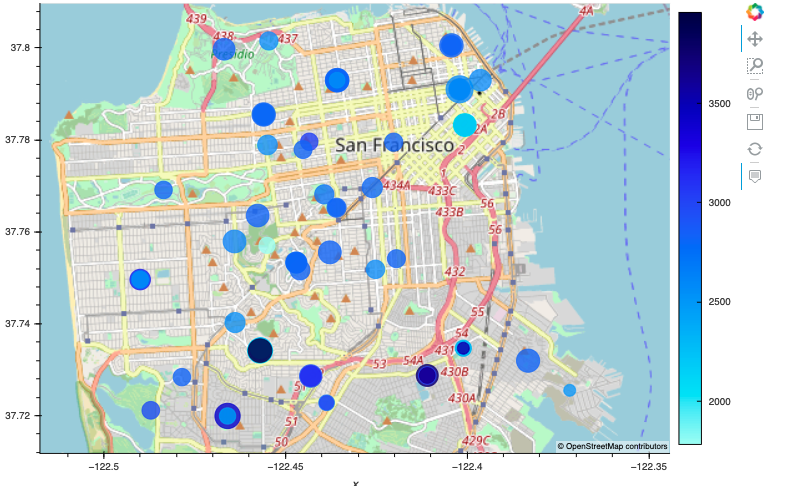## Build an Interactive Neighbourhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualisations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighbourhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighbourhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighbourhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighbourhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighbourhood_info_df` that groups the data by neighbourhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighbourhood_locations_df` DataFrame with the `all_neighbourhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighbourhoods_df`. The second cell cleans the data and sets the “Neighbourhood” column. Be sure to run these cells to create the `all_neighbourhoods_df` DataFrame, which you’ll need to create the geospatial visualisation.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighbourhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `frame_width` parameter to 700.

    * Set the `frame_height` parameter to 500.

    * Include a descriptive title.

    Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighbourhood has the highest gross rent, and which has the highest sale price per square foot?

### Step 1: Read the `neighbourhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighbourhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighbourhood”.

In [13]:
# Load neighbourhoods coordinates data

neighbourhood_locations_df = pd.read_csv(neighbourhood_locations_data)
neighbourhood_locations_df.isnull().count()
neighbourhood_locations_df.dropna()

neighbourhood_locations_df.set_index('Neighbourhood', inplace=True)


# Review the DataFrame
display(neighbourhood_locations_df)

,Lat,Lon
Neighbourhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighbourhood_info_df` that groups the data by neighbourhood. Aggregate the results by the `mean` of the group.

In [14]:
# Calculate the mean values for each neighbourhood
all_neighbourhood_info_df = sfo_data_df.groupby('neighbourhood')[['sale_price_sqr_foot', 'gross_rent', 'housing_units']].mean()

# Review the resulting DataFrame
display(all_neighbourhood_info_df)

,sale_price_sqr_foot,gross_rent,housing_units
neighbourhood,,,
Alamo Square,366.020712,2817.285714,378401.00
Anza Vista,373.382198,3031.833333,379050.00
Bayview,204.588623,2318.400000,376454.00
Bayview Heights,590.792839,3739.000000,382295.00
Bernal Heights,576.746488,3080.333333,379374.50
...,...,...,...
West Portal,498.488485,2515.500000,376940.75
Western Addition,307.562201,2555.166667,377427.50
Westwood Highlands,533.703935,2250.500000,376454.00


### Step 3: Review the two code cells that concatenate the `neighbourhood_locations_df` DataFrame with the `all_neighbourhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighbourhoods_df`. 

The second cell cleans the data and sets the “Neighbourhood” column. 

Be sure to run these cells to create the `all_neighbourhoods_df` DataFrame, which you’ll need to create the geospatial visualisation.

In [15]:
# Using the Pandas `concat` function, join the 
# neighbourhood_locations_df and the all_neighbourhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighbourhoods_df = pd.concat(
    [neighbourhood_locations_df, all_neighbourhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighbourhoods_df.head())
display(all_neighbourhoods_df.tail())


,Lat,Lon,sale_price_sqr_foot,gross_rent,housing_units
Alamo Square,37.791012,-122.402100,366.020712,2817.285714,378401.0
Anza Vista,37.779598,-122.443451,373.382198,3031.833333,379050.0
Bayview,37.734670,-122.401060,204.588623,2318.400000,376454.0
Bayview Heights,37.728740,-122.410980,590.792839,3739.000000,382295.0
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN


,Lat,Lon,sale_price_sqr_foot,gross_rent,housing_units
Ingleside,NaN,NaN,367.895144,2509.000000,377427.5
Jordan ParkLaurel Heights,NaN,NaN,529.384185,2817.285714,378401.0
Outer Richmond,NaN,NaN,473.900773,2817.285714,378401.0
ParnassusAshbury Heights,NaN,NaN,632.740454,2817.285714,378401.0
Van Ness Civic Center,NaN,NaN,404.150180,2817.285714,378401.0


In [16]:
# Call the dropna function to remove any neighbourhoods that do not have data
all_neighbourhoods_df = all_neighbourhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighbourhood" for use in the Visualisation
all_neighbourhoods_df = all_neighbourhoods_df.rename(columns={"index": "Neighbourhood"})

# Review the resulting DataFrame
display(all_neighbourhoods_df.head())
display(all_neighbourhoods_df.tail())

,Neighbourhood,Lat,Lon,sale_price_sqr_foot,gross_rent,housing_units
0,Alamo Square,37.791012,-122.402100,366.020712,2817.285714,378401.0
1,Anza Vista,37.779598,-122.443451,373.382198,3031.833333,379050.0
2,Bayview,37.734670,-122.401060,204.588623,2318.400000,376454.0
3,Bayview Heights,37.728740,-122.410980,590.792839,3739.000000,382295.0
5,Buena Vista Park,37.768160,-122.439330,452.680591,2698.833333,378076.5


,Neighbourhood,Lat,Lon,sale_price_sqr_foot,gross_rent,housing_units
68,West Portal,37.74026,-122.463880,498.488485,2515.500000,376940.75
69,Western Addition,37.79298,-122.435790,307.562201,2555.166667,377427.50
70,Westwood Highlands,37.73470,-122.456854,533.703935,2250.500000,376454.00
71,Westwood Park,37.73415,-122.457000,687.087575,3959.000000,382295.00
72,Yerba Buena,37.79298,-122.396360,576.709848,2555.166667,377427.50


### Step 4: Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighbourhoods_df` DataFrame. Be sure to do the following:

* Set the `geo` parameter to True.
* Set the `size` parameter to “sale_price_sqr_foot”.
* Set the `color` parameter to “gross_rent”.
* Set the `frame_width` parameter to 700.
* Set the `frame_height` parameter to 500.
* Include a descriptive title.

In [17]:
# Create a plot to analyse neighbourhood info
all_neighbourhoods_plot = all_neighbourhoods_df.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    size='sale_price_sqr_foot',
    scale=1.2,
    color='gross_rent',
    alpha=0.6,
    hover_color='red',
    hover_cols=['Neighbourhood','housing_units'],
    tiles='OSM',
    frame_width=700,
    frame_height=500,
    title='Neighbourhoods Analysis: Sale Price and Gross Rent' 
)

all_neighbourhoods_plot


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (gross_rent,sale_price_sqr_foot,Neighbourhood,housing_units)

### Step 5: Use the interactive map to answer the following question:

**Question:** Which neighbourhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer:** The Neighbourhood with the highest gross rent is Westwood Park.
            The Neighbourhood with the highest sale price per square foot is Union Square District.

## Compose Your Data Story

Based on the visualisations that you created, answer the following questions:

**Question:**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighbourhoods across San Francisco?

**Answer:** The trend in the rental income growth shows an increase in rent across all neighbourhoods as compared to fluctuations in the sale price with some neighboourhoods having a lower average sale price per squre foor over time and this hold true for all neighbourhoods,Incease rental income-Fluctuating sale price!

**Question:** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighbourhoods exist that you would suggest for investment, and why?

**Answer:** I can share insights regarding the average rental income and sales prices pr square foot and plot the data on an interactive map outlining the best potentail neighbourhoods for investment. Yes neighbourhoods exist and I would suggest those with a recent drop in sale price and have shown a positive growth in gross rent over time! 

In [18]:
print(f"The End :)")

The End :)
